<a href="https://colab.research.google.com/github/subhedarsoham18/-binary-classifier-using-logistic-regression/blob/main/binary_classifier_using_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np

file_path = "data.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/breast-cancer-wisconsin-data",
  path=file_path

)

print("First 5 records:", df.head())
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean and preprocess
df_cls_clean = df.drop(columns=['id', 'Unnamed: 32'])
df_cls_clean['diagnosis'] = df_cls_clean['diagnosis'].map({'M': 1, 'B': 0})

# Step 2: Features and labels
X = df_cls_clean.drop(columns='diagnosis')
y = df_cls_clean['diagnosis']

# Step 3: Train/test split and standardize
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Step 5: Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

/tmp/ipython-input-11-1134164909.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_

In [12]:
from sklearn.metrics import precision_score, recall_score

thresholds = np.arange(0.0, 1.01, 0.05)
precision_vals = []
recall_vals = []

for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)  # change threshold
    precision_vals.append(precision_score(y_test, y_pred_thresh))
    recall_vals.append(recall_score(y_test, y_pred_thresh))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


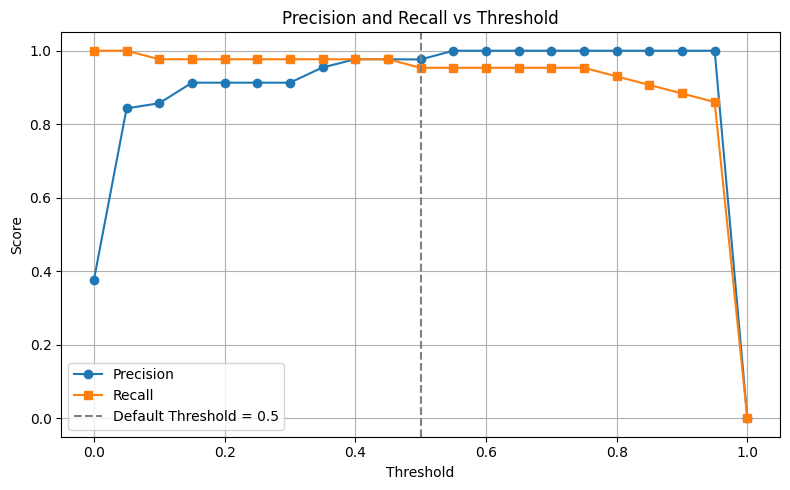

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_vals, label="Precision", marker='o')
plt.plot(thresholds, recall_vals, label="Recall", marker='s')
plt.axvline(0.5, linestyle='--', color='gray', label='Default Threshold = 0.5')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
